In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# istall the Xgboost library 
#!pip install xgboost

In [3]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

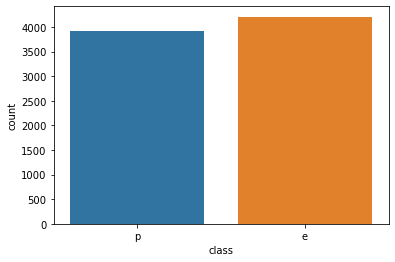

In [6]:
sns.countplot(data=df,x='class')

In [7]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.describe().transpose()


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
X= df.drop('class',axis=1)

In [10]:
X=pd.get_dummies(X,drop_first=True)
y=pd.get_dummies(df['class'],drop_first=True)

# train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [13]:
y_test

,p
4242,1
2057,0
4016,1
7246,0
7746,0
...,...
415,0
4376,1
1533,0
3413,0


# modelilng

In [14]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
# prediction
train_prediction = xgb_model.predict(X_train)
test_prediction = xgb_model.predict(X_test)


## evaluation

In [16]:
# accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

1.0
1.0


In [17]:
# cross validation score

from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_model,X,y,cv=5)
print(score)

score.mean()

[0.84246154 1.         0.99753846 1.         0.82758621]


0.9335172413793102

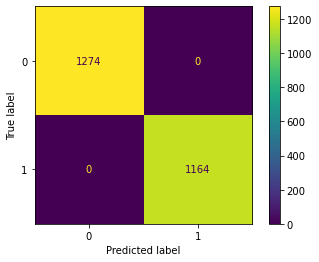

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_model,X_test,y_test)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_prediction)

array([[1274,    0],
       [   0, 1164]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# hyper parameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV 

In [22]:
estimator= XGBClassifier()

param_grid = {'n_estimators': [1,5,8,10,15,40,100],'max_depth':[3,4,5],'gamma':[0,0.1,0.2,.3,1,2,3]}

hp=GridSearchCV(estimator,param_grid,cv=5)
hp.fit(X_train,y_train)
hp.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 100}

# final model

In [23]:
xgb= XGBClassifier(n_estimators=100,max_depth=3)
xgb.fit(X_train,y_train)

test_prediction= xgb.predict(X_test)
train_prediction = xgb.predict(X_train)

print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

score= cross_val_score(xgb,X,y,cv=5)
print(score)
score.mean()


1.0
1.0
[0.84246154 1.         0.99753846 1.         0.87315271]


0.9426305418719212

In [24]:
a=xgb.feature_importances_
a

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.23699983e-05, 0.00000000e+00, 6.65383777e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.29114506e-04,
       2.03473028e-02, 3.42911594e-02, 2.98870075e-03, 3.31984423e-02,
       1.04769491e-01, 5.41313877e-03, 1.57597587e-01, 2.06267610e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.10914484e-03,
       1.07188569e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.32419469e-05, 0.00000000e+00,
       4.05466155e-04, 3.34230601e-04, 3.07758689e-01, 2.88943520e-05,
       1.94335312e-01, 1.99555675e-03, 1.38460557e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.77277641e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [25]:
imp_feature=pd.DataFrame(index=X.columns,data=a,columns=['feature importance'])
imp_feature

,feature importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000012
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [36]:
b=imp_feature.sort_values('feature importance')
b

,feature importance
cap-color_w,0.000529
spore-print-color_n,0.000798
population_y,0.000924
stalk-surface-above-ring_k,0.001996
ring-number_t,0.002261
odor_c,0.002989
stalk-color-below-ring_n,0.003288
population_c,0.003911
spore-print-color_w,0.004633
gill-spacing_w,0.005109


In [27]:
imp_feature.describe()

,feature importance
count,95.000000
mean,0.010526
std,0.041641
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000499
max,0.307759


In [28]:
imp_feature=imp_feature[imp_feature['feature importance']>0.000527]
imp_feature

,feature importance
cap-color_w,0.000529
cap-color_y,0.020347
bruises_t,0.034291
odor_c,0.002989
odor_f,0.033198
odor_l,0.104769
odor_m,0.005413
odor_n,0.157598
odor_p,0.020627
gill-spacing_w,0.005109


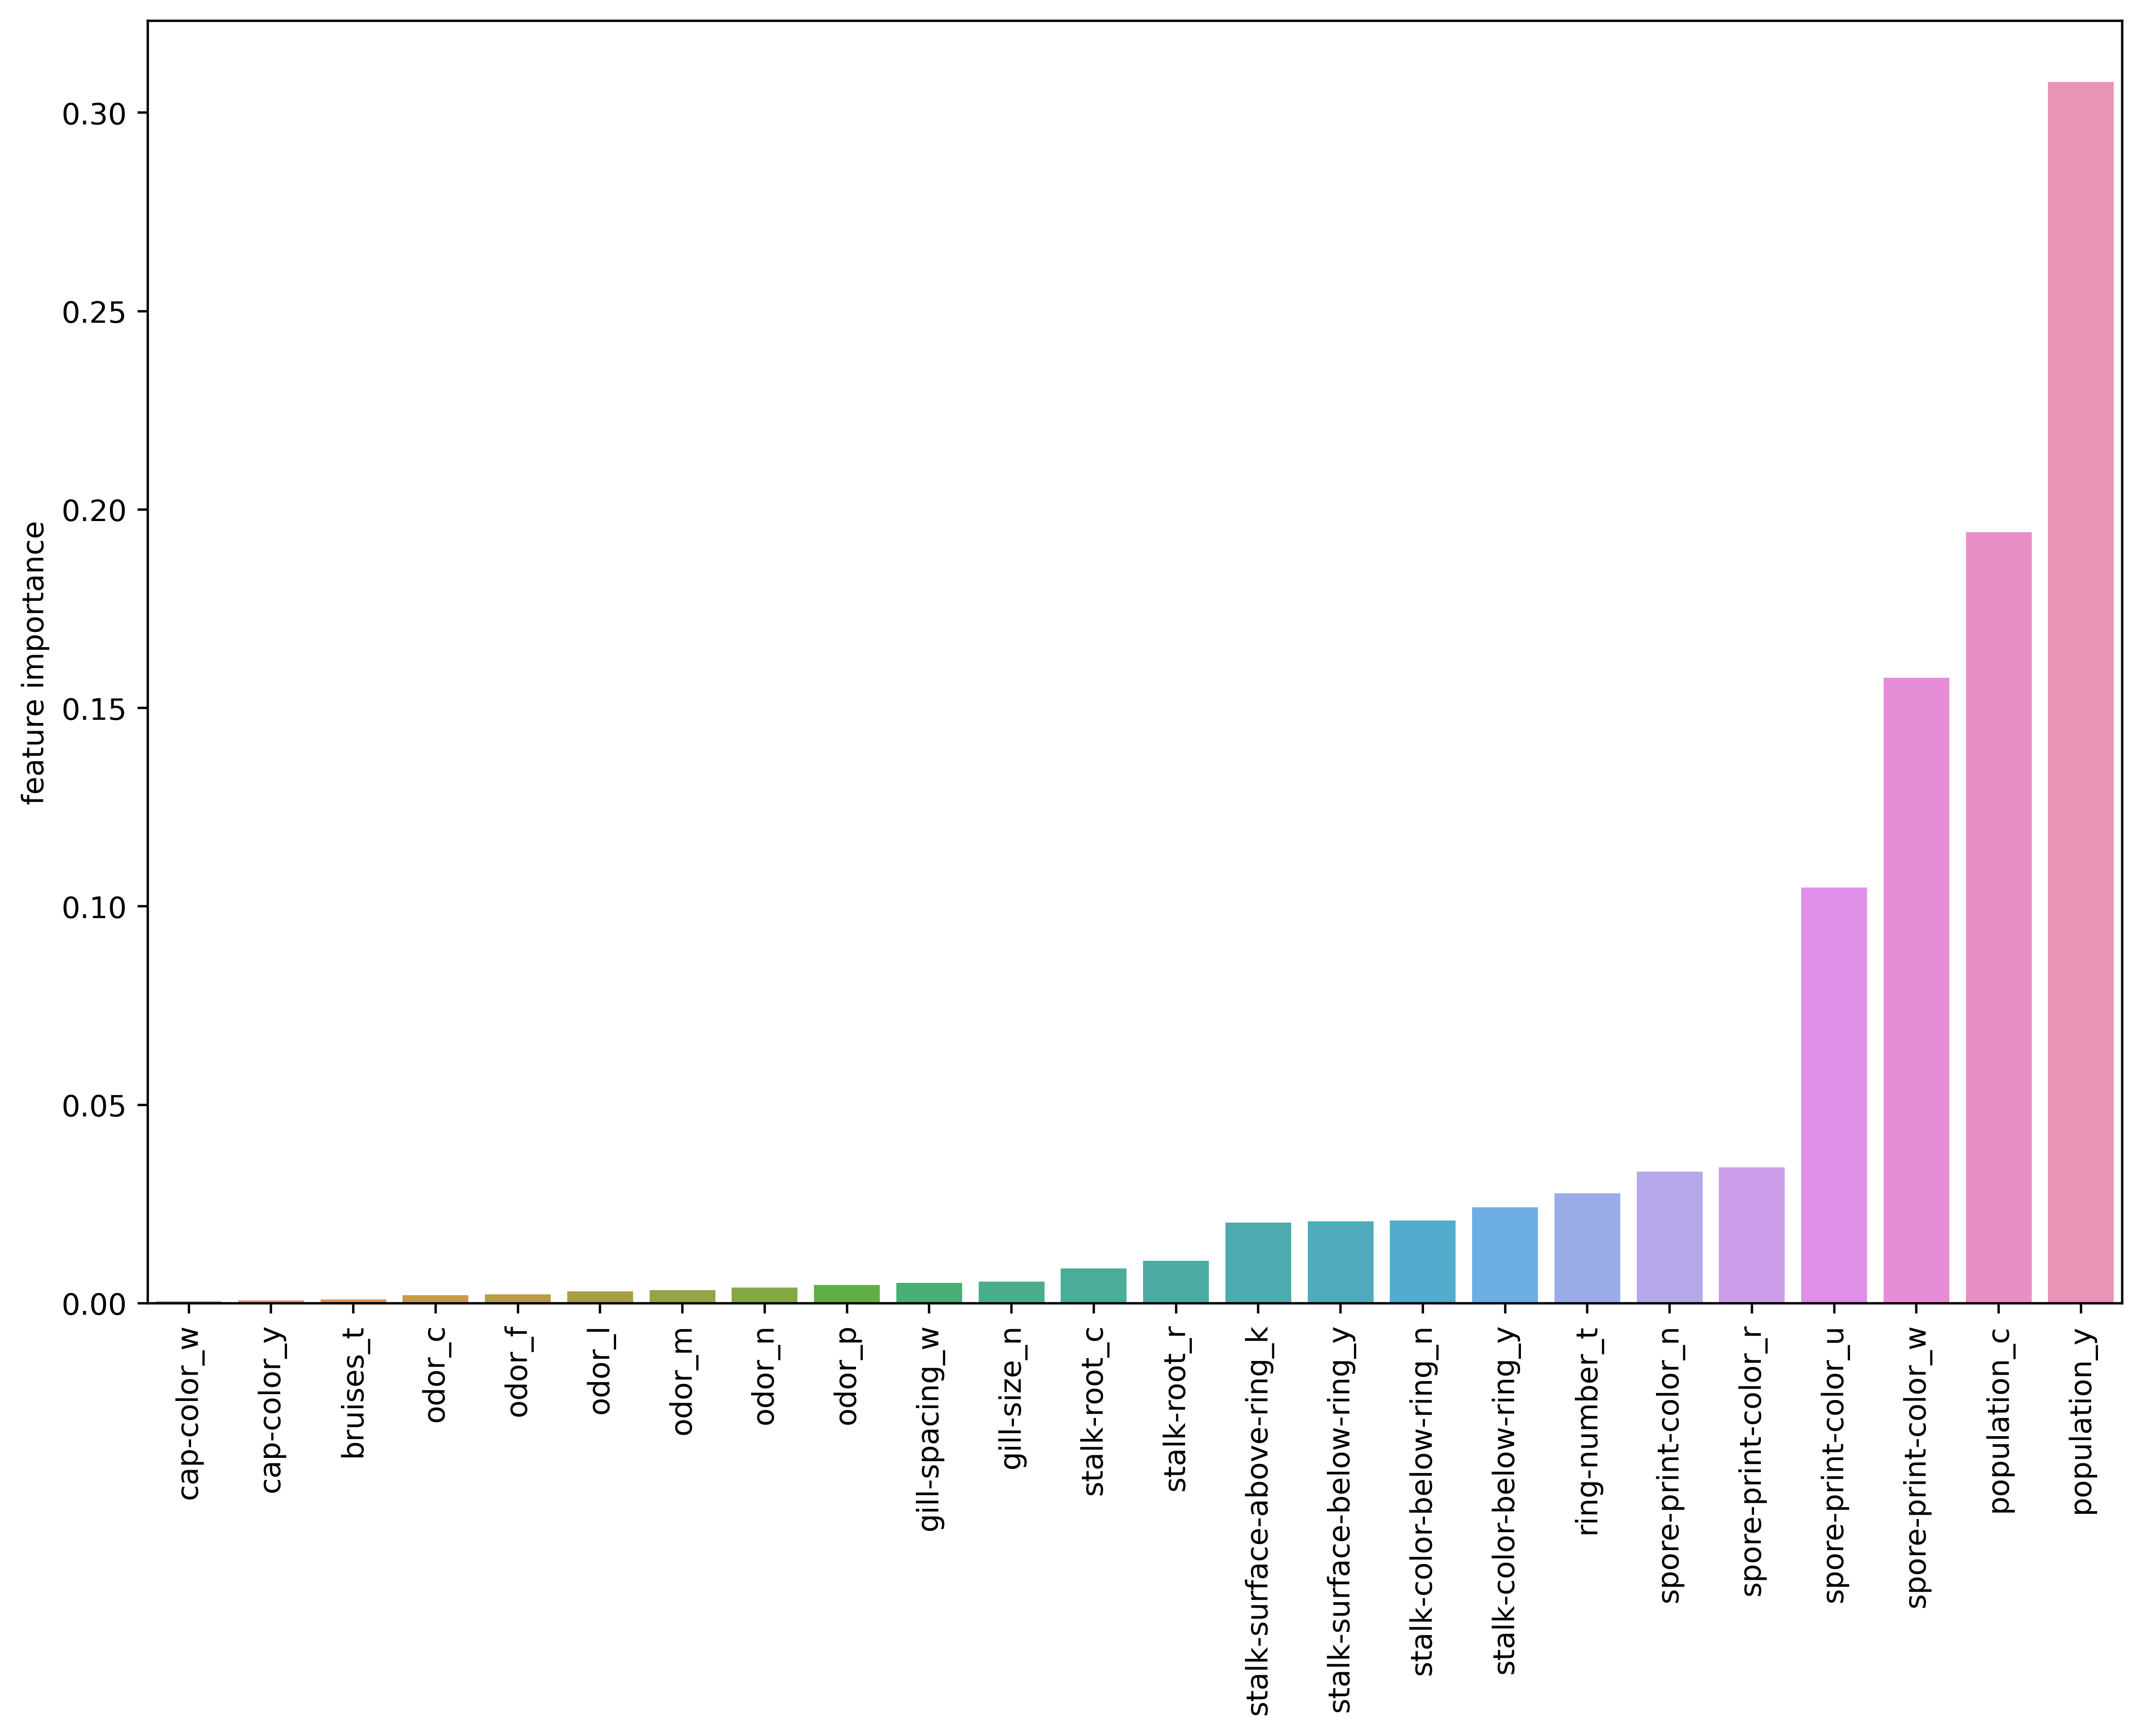

In [37]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(x=imp_feature.index,y='feature importance',data=b)
plt.xticks(rotation=90)
plt.show()

In [31]:
imp_feature.index

Index(['cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'gill-spacing_w', 'gill-size_n',
       'stalk-root_c', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_y', 'stalk-color-below-ring_n',
       'stalk-color-below-ring_y', 'ring-number_t', 'spore-print-color_n',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'population_c', 'population_y'],
      dtype='object')

# final model with imp features 

In [32]:
X=X[['cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'gill-spacing_w', 'gill-size_n',
       'stalk-root_c', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_y', 'stalk-color-below-ring_n',
       'stalk-color-below-ring_y', 'ring-number_t', 'spore-print-color_n',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'population_c', 'population_y']]


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

********************
1.0
1.0
********************
[0.84246154 1.         1.         1.         0.95073892]
0.9586400909435392
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

********************


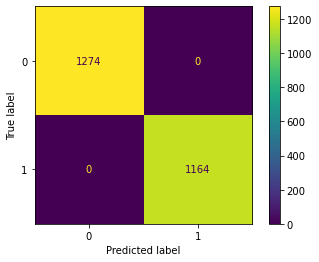

In [34]:
from xgboost import XGBClassifier
xgb= XGBClassifier(n_estimators=100,max_depth=3,gamma=0)
xgb.fit(X_train,y_train)

test_prediction= xgb.predict(X_test)
train_prediction = xgb.predict(X_train)
print('*'*20)
from sklearn.metrics import plot_confusion_matrix,accuracy_score,confusion_matrix

print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))
print('*'*20)

score= cross_val_score(xgb,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)

print(classification_report(y_test,test_prediction))

print('*'*20)

plot_confusion_matrix(xgb,X_test,y_test)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_prediction)

array([[1274,    0],
       [   0, 1164]], dtype=int64)